In [53]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, '../src')
from utils import *
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
fr_stopwords = french_stopwords()

In [55]:
interval = [10**-4, 10**-3, 10**-2, 10**-1, 1, 10, 10**2, 10**3]

On va prendre le vectorizer avec la meilleure performance en 1-grammes et le teseter avec 2-grammes et 3-grammes

## Decathlon

In [56]:
data = pd.read_csv('../csv/decathlon_reviews.csv')
review_list=np.array(list(data.review))
target = np.array(data.label)

### 1) 2-grammes

In [57]:
fname="decathlon/v_2_grammes"

In [58]:
[vectorizer, X] = build_vectorizer(review_list, stopwords=None, \
                                         b_rmaccent=True, b_rmnumbers=True, max_features=10000,n=(2,2))

save_vectorizer(vectorizer,fname)

Removing numbers
Removing accents
Keeping the top 10000 occurring tokens


In [59]:
vectorizer=load_vectorizer(fname)
X= vectorizer.fit_transform(review_list.astype('U'))

In [60]:
features = vectorizer.get_feature_names()
features

['10 12',
 '10 2012',
 '10 km',
 '100 euros',
 '12ème acheté',
 '1er prix',
 '1ere utilisation',
 '1ère fois',
 '1ère utilisation',
 '2012 trouve',
 '2eme utilisation',
 '2ème paire',
 '30min essuyer',
 '35 38',
 '39 42',
 '41 42',
 '43 46',
 '50 est',
 '5minutes sur',
 'AGREABLE PORTER',
 'Acheter pour',
 'Acheté pour',
 'Achetée pour',
 'Achetées pour',
 'Adidas Nike',
 'Agréable porter',
 'Aleksandra mais',
 'Alors que',
 'Apres avoir',
 'Apres une',
 'Après avoir',
 'Après deux',
 'Après les',
 'Après mois',
 'Après plusieurs',
 'Après quelques',
 'Après seulement',
 'Après trois',
 'Après une',
 'Attention aux',
 'Attention elles',
 'Attention pas',
 'Aucun problème',
 'Aucun regret',
 'Aucun soucis',
 'Aussi bien',
 'Autre chose',
 'Avec les',
 'Avec une',
 'BIEN POUR',
 'BON PRODUIT',
 'BON RAPPORT',
 'BONNE QUALITE',
 'BOUGE PAS',
 'BRAVO POUR',
 'Beau facile',
 'Bien plus',
 'Bien pour',
 'Bien pratique',
 'Bien que',
 'Bien sur',
 'Bon achat',
 'Bon ballon',
 'Bon compromis',

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3,random_state=0,stratify=target)

In [62]:
mean_scores = []
for C in interval:
    clf = LinearSVC(C=C)
    scores = cross_val_score(clf, X_train, y_train, cv=4,scoring='f1')
    mean_scores.append(np.mean(scores)) 

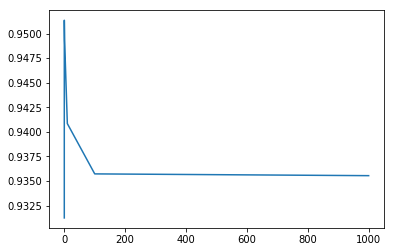

In [63]:
plt.plot(interval, mean_scores)
plt.show()

In [64]:
C_opt = interval[np.argmax(mean_scores)]
clf = LinearSVC(C=C_opt)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
f1_score(y_test,y_pred,pos_label=-1)

0.5754539762053852

### 2) 3-grammes

In [66]:
fname="decathlon/v_3_grammes"

In [67]:
[vectorizer, X] = build_vectorizer(review_list, stopwords=None, \
                                         b_rmaccent=True, b_rmnumbers=True, max_features=10000,n=(3,3))

save_vectorizer(vectorizer,fname)

Removing numbers
Removing accents
Keeping the top 10000 occurring tokens


In [68]:
vectorizer=load_vectorizer(fname)
X= vectorizer.fit_transform(review_list.astype('U'))

In [69]:
features = vectorizer.get_feature_names()
features

['02 12 suis',
 '10 12degrés est',
 '10 km semi',
 '12 suis satisfaite',
 '12ans est est',
 '12degrés est parfait',
 '12ème acheté presque',
 '130 Euros pour',
 '15kg est très',
 '15kg quand elle',
 '16 18 ans',
 '1par an mais',
 '1ère bonne impression',
 '1ère fois que',
 '1ère fois testé',
 '1ère fois une',
 '1ère utilisation très',
 '2012 trouve juste',
 '2013 produit parfait',
 '20k elles ont',
 '20kg Pas gros',
 '20kg charge delà',
 '20kms prévue pour',
 '28mm 50mm pourrais',
 '2eme utilisation bord',
 '2h lavage elles',
 '30 Peut etre',
 '30 envers surcroît',
 '30m plus fixer',
 '30min essuyer dans',
 '41 42 que',
 '42 que soit',
 '43 46 récemment',
 '46 récemment magasin',
 '50 attendais des',
 '50mm pourrais dire',
 '5ans ont voulu',
 '5minutes sur sol',
 '6eme paire 1par',
 '70L sert pour',
 '800 modèle car',
 '80m touche vite',
 '90 BOUGE PAS',
 '900 qui étiraient',
 'APPRENDRE LAVER LINGE',
 'Acheté pour mon',
 'Achetée pour faire',
 'Achetées cet été',
 'Achetées x4 pour',


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3,random_state=0,stratify=target)

In [71]:
mean_scores = []
for C in interval:
    clf = LinearSVC(C=C)
    scores = cross_val_score(clf, X_train, y_train, cv=4,scoring='f1')
    mean_scores.append(np.mean(scores)) 

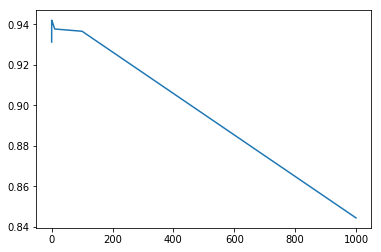

In [72]:
plt.plot(interval, mean_scores)
plt.show()

In [73]:
C_opt = interval[np.argmax(mean_scores)]
clf = LinearSVC(C=C_opt)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
f1_score(y_test,y_pred,pos_label=-1)

0.32847577786530135

## Movies

In [74]:
data_movies = pd.read_csv('../csv/movie_reviews.csv')
review_list_movies=np.array(list(data_movies.review))
target_movies = np.array(data_movies.label)

### 1) 2-grammes

In [75]:
fname="movies/v_2_grammes"

In [76]:
[vectorizer, X] = build_vectorizer(review_list_movies, stopwords=fr_stopwords, b_stemming=True,\
                                          b_rmaccent=True, b_rmnumbers=True, max_features=10000,n=(2,2))

save_vectorizer(vectorizer,fname)

Removing numbers
Removing stopwords
Stemming
Removing accents
Keeping the top 10000 occurring tokens


In [77]:
vectorizer=load_vectorizer(fname)
X= vectorizer.fit_transform(review_list_movies.astype('U'))


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, target_movies, test_size=0.3,random_state=0,stratify=target_movies)

In [79]:
mean_scores = []
for C in interval[1:]:
    clf = LinearSVC(C=C)
    scores = cross_val_score(clf, X_train, y_train, cv=4,scoring='f1')
    mean_scores.append(np.mean(scores)) 

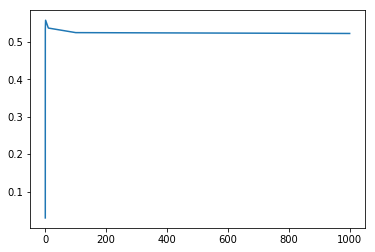

In [80]:
plt.plot(interval[1:], mean_scores)
plt.show()

In [81]:
C_opt = interval[np.argmax(mean_scores)]
clf = LinearSVC(C=C_opt)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
f1_score(y_test,y_pred,pos_label=-1)

0.9355749171677507

### 2) 3-grammes

In [82]:
fname="movies/v_3_grammes"

In [83]:
[vectorizer, X] = build_vectorizer(review_list_movies, stopwords=fr_stopwords, b_stemming=True,\
                                          b_rmaccent=True, b_rmnumbers=True, max_features=10000,n=(3,3))

save_vectorizer(vectorizer,fname)

Removing numbers
Removing stopwords
Stemming
Removing accents
Keeping the top 10000 occurring tokens


In [84]:
vectorizer=load_vectorizer(fname)
X= vectorizer.fit_transform(review_list_movies.astype('U'))


In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, target_movies, test_size=0.3,random_state=0,stratify=target_movies)

In [86]:
mean_scores = []
for C in interval[1:]:
    clf = LinearSVC(C=C)
    scores = cross_val_score(clf, X_train, y_train, cv=4,scoring='f1')
    mean_scores.append(np.mean(scores)) 

/home/arij/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/arij/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/arij/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/arij/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


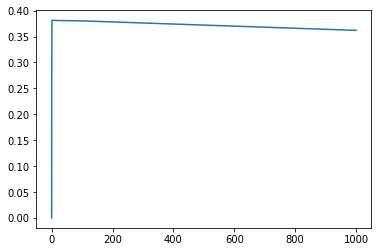

In [87]:
plt.plot(interval[1:], mean_scores)
plt.show()

In [88]:
C_opt = interval[np.argmax(mean_scores)]
clf = LinearSVC(C=C_opt)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
f1_score(y_test,y_pred,pos_label=-1)

0.9236242884250474

## Tweets Traduis

In [89]:
data_git = pd.read_csv("../csv/tweets_git.csv")
tweet_list_start=np.array(data_git.review)[:10000].astype('U')
tweet_list_end=np.array(data_git.review)[-10000:].astype('U')
label_list_start=np.array(data_git.label)[:10000]
label_list_end=np.array(data_git.label)[-10000:]

In [90]:
target_tweets = np.append(label_list_start,label_list_end)
tweet_list = np.append(tweet_list_start,tweet_list_end)

### 1) 2-grammes

In [91]:
fname="twitter/v_2_grammes"

In [92]:
[vectorizer, X] = build_vectorizer(tweet_list, stopwords=None, \
                                         b_rmaccent=True, b_rmnumbers=True, max_features=10000,n=(2,2))

save_vectorizer(vectorizer,fname)

Removing numbers
Removing accents
Keeping the top 10000 occurring tokens


In [93]:
vectorizer=load_vectorizer(fname)
X= vectorizer.fit_transform(tweet_list.astype('U'))

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, target_tweets, test_size=0.3,random_state=0,stratify=target_tweets)

In [95]:
mean_scores = []
for C in interval:
    clf = LinearSVC(C=C)
    scores = cross_val_score(clf, X_train, y_train, cv=4)
    mean_scores.append(np.mean(scores)) 

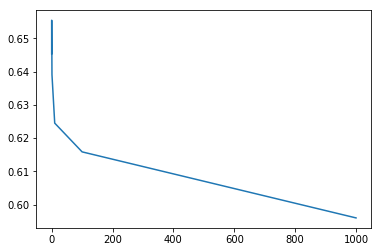

In [96]:
plt.plot(interval, mean_scores)
plt.show()

In [97]:
C_opt = interval[np.argmax(mean_scores)]
clf = LinearSVC(C=C_opt)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.656

### 2) 3-grammes

In [98]:
fname="twitter/v_3_grammes"

In [99]:
[vectorizer, X] = build_vectorizer(tweet_list, stopwords=None, \
                                         b_rmaccent=True, b_rmnumbers=True, max_features=10000,n=(3,3))

save_vectorizer(vectorizer,fname)

Removing numbers
Removing accents
Keeping the top 10000 occurring tokens


In [100]:
vectorizer=load_vectorizer(fname)
X= vectorizer.fit_transform(tweet_list.astype('U'))

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, target_tweets, test_size=0.3,random_state=0,stratify=target_tweets)

In [102]:
mean_scores = []
for C in interval:
    clf = LinearSVC(C=C)
    scores = cross_val_score(clf, X_train, y_train, cv=4)
    mean_scores.append(np.mean(scores)) 

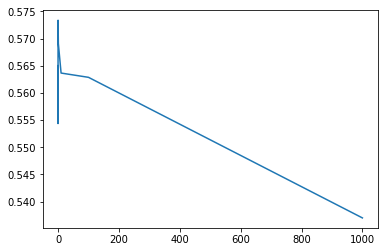

In [103]:
plt.plot(interval, mean_scores)
plt.show()

In [104]:
C_opt = interval[np.argmax(mean_scores)]
clf = LinearSVC(C=C_opt)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.579